<a href="https://colab.research.google.com/github/ajaysaikiran2208/Recommendation-Systems/blob/main/A_personalized_music_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ***A PERSONALIZED MUSIC RECOMMENDATION SYTEM***

##Table of Content

***1. Introduction***

    1 Libraries And Utilities

    2 Data Loading

***2. Exploratory Data Analysis(EDA)***

    1.Identification of variables and data types

    2. Analyzing the basic metrics

    3. Non-Graphical Univariate Analysis

    4. Graphical Univariate Analysis

    5. Bivariate Analysis

    6. Variable transformations

    7. Missing value treatment

    8. Outlier treatment

    9. Correlation Analysis

    10. Dimensionality Reduction


3.Conclusion

***Introduction to Recommendation systems:***

In this modern world we are overloaded with data and this data provides us the useful information. But it's not possible for the user to extract the information which interest them from these data. In order to help the user to find out information about the product , recommedation systems where developed.

Recommeder system creates a similarity between the user and items and exploits the similarity between user/item to make recommendations.

***What recommeder system can solve ?***

It can help the user to find the right product.
It can increase the user engagement. For example, there's 40% more click on the google news due to recommendation.
It helps the item providers to deliver the items to the right user.In Amazon , 35 % products get sold due to recommendation.
It helps to make the contents more personalized.In Netflix most of the rented movies are from recommendations.

#Importance of EDA

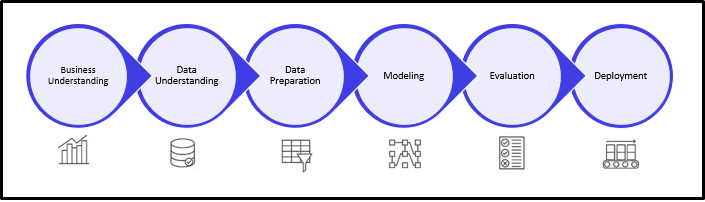

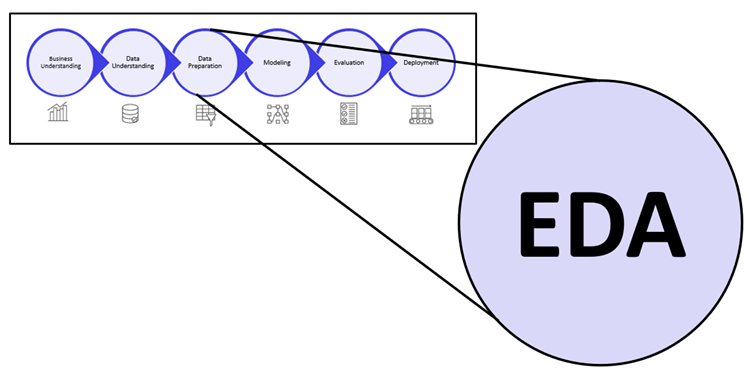

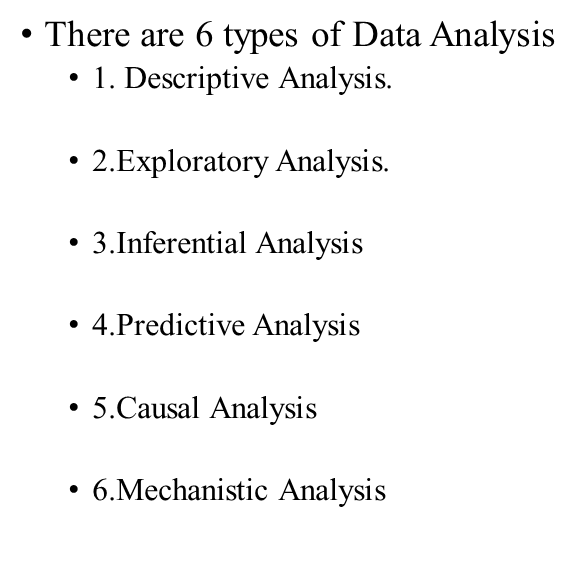

Exploratory Data Analysis(EDA)

What is EDA? Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. 

Out Come of this phase as below

1.Understanding the given dataset and helps clean up the given dataset.

2.It gives you a clear picture of the features and the relationships between them.

3.Providing guidelines for essential variables and leaving behind/removing non-essential variables.

4.Handling Missing values or human error.

5.Identifying outliers.


EDA process would be maximizing insights of a dataset.
This process is time-consuming but very effective, the below activities are involved during this phase, it would be varied and depends on the available data and acceptance from the customer.

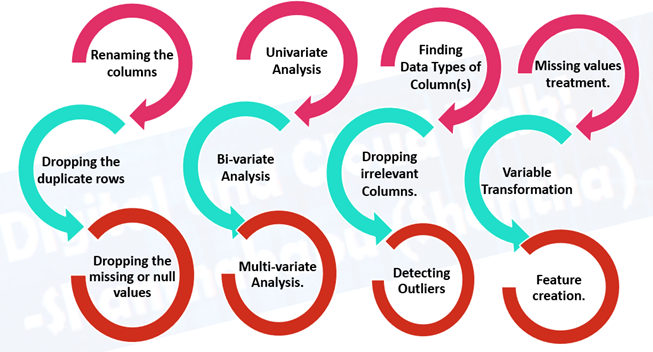

Attribute Information:

● **userId** : Every user identified with a unique id

● **Song_Id** : Every song identified with a unique id

● **Song_count** : song count corresponding to individual user.

● **Track_id**: Track id of the song.

● **Singer** : Singer who has sung the song.

● **Title** : Name of the Song


#Libraries And Utilities

In [3]:
import pandas as pd   #Used for Data Analysis
import numpy as np     #Used to Carry Mathematical operation
import matplotlib.pyplot as plt #Tool for data Visualization
import seaborn as sns       #Tool for data Visualization
import random  #Used to generate random numbers
import os   #To interact with the underlying operating systems
from datetime import datetime  #Useful to deal with data and time
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')  #Useful to handle warnings

# Basic Data Exploration


In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:

– head of the dataset

– the shape of the dataset

– info of the dataset

– summary of the dataset

In [4]:
songs = pd.read_csv("/content/kaggle_songs.txt", sep=" ",header=None)  #It contains details of the songs like song_id

In [6]:
songs.columns=["song_id","Serial_Number"]  #  Naming the columns

The head function will tell you the top records in the data set. By default, **python shows you only the top 5 records.**

In [7]:
songs.head(10)

,song_id,Serial_Number
0,SOAAADD12AB018A9DD,1
1,SOAAADE12A6D4F80CC,2
2,SOAAADF12A8C13DF62,3
3,SOAAADZ12A8C1334FB,4
4,SOAAAFI12A6D4F9C66,5
5,SOAAAGK12AB0189572,6
6,SOAAAGN12AB017D672,7
7,SOAAAGO12A67AE0A0E,8
8,SOAAAGP12A6D4F7D1C,9
9,SOAAAGQ12A8C1420C8,10


The shape attribute tells us a **number of observations** and **variables** we have in the data set. It is used to check the dimension of data.

In [8]:
songs.shape

(386213, 2)

The **describe** **method** will help to see how data has been **spread for numerical values**. We can clearly see the **minimum value, mean values, different percentile values, and maximum values.**

**info()** is used to check the **Information about the data** and the **datatypes** of each respective attribute

In [9]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386213 entries, 0 to 386212
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   song_id        386213 non-null  object
 1   Serial_Number  386213 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.9+ MB


In [10]:
songs.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Serial_Number,386213.0,193107.0,111490.234095,1.0,96554.0,193107.0,289660.0,386213.0


This data set contained 386213 rows × 2 columns it is an categorical data.Hence we are not carying out any statistical analysis

In [11]:
users=pd.read_csv("/content/kaggle_users.txt",sep=" ",header=None)  #This data contains data related to user like user_id

In [12]:
users.columns=["user_id"] #  Naming the columns

In [13]:
users

,user_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8
...,...
109995,07f2f354a2a4390624e0d04e4a555ef67e98f673
109996,fe752b1aa2a12dbc203c37b70881d88481c655f1
109997,ab79461415bb9db956def3a897886d0754ddddfb
109998,fc072bde2043756ea30ff07e4a5311e34825b4df


This data set contains **110000 rows × 1columns** values in the dataset

In [14]:
unique_tracks=pd.read_csv("/content/unique_tracks.txt",sep="<SEP>",names=["track_id","song_id","singer_name","release"]) #This dataset contains columns like track_id,song_id,singer_name,Title

In [15]:
unique_tracks

,track_id,song_id,singer_name,release
0,TRMMMYQ128F932D901,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,TRMMMKD128F425225D,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,TRMMMRX128F93187D9,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,TRMMMCH128F425532C,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,TRMMMWA128F426B589,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens
...,...,...,...,...
999995,TRYYYUS12903CD2DF0,SOTXAME12AB018F136,Kiko Navarro,O Samba Da Vida
999996,TRYYYJO128F426DA37,SOXQYIQ12A8C137FBB,Kuldeep Manak,Jago Chhadeo
999997,TRYYYMG128F4260ECA,SOHODZI12A8C137BB3,Gabriel Le Mar,Novemba
999998,TRYYYDJ128F9310A21,SOLXGOR12A81C21EB7,Elude,Faraday


This data set contains **1000000 rows × 4 columns** values in the dataset

In [16]:
profile_song=pd.read_csv("/content/taste_profile_song_to_tracks.txt",sep="\t",header=None,error_bad_lines=False,names=["song_id","track_id"]) #This dataset

In [17]:
profile_song

,song_id,track_id
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17
...,...,...
386208,SOZZZRJ12AB0187A75,TRTMMRY12903CDE19D
386209,SOZZZRV12A8C1361F1,TRCEWAR128F425D1B6
386210,SOZZZSR12AB01854CD,TRPUDMM128F9308E1C
386211,SOZZZWD12A6D4F6624,TRJMEUS128F1458975


This dataset contains **386213 rows × 2 columns**

In [18]:
visible_evalutation = pd.read_csv("/content/kaggle_visible_evaluation_triplets.txt",sep='\t',names=["user_id","song_id","song_count"])


In [19]:
visible_evalutation.head()

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [20]:
visible_evalutation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1450933 non-null  object
 1   song_id     1450933 non-null  object
 2   song_count  1450933 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.2+ MB


In [21]:
visible_evalutation.shape #Inorder to  get the shape of the data

(1450933, 3)

In [22]:
visible_evalutation.dtypes # Data types of the data present in the dataset

user_id       object
song_id       object
song_count     int64
dtype: object

In [23]:
visible_evalutation.describe().transpose()  #Basic Statistical data

,count,mean,std,min,25%,50%,75%,max
song_count,1450933.0,3.187149,7.051664,1.0,1.0,1.0,3.0,923.0


In [24]:
visible_evalutation.isnull().sum()

user_id       0
song_id       0
song_count    0
dtype: int64

#Handling Duplicate records

In [57]:
print(sum(visible_evalutation.duplicated()))

0


#Handling missing value

There are various ways of treating your missing values in the data set. And which technique to use when is actually dependent on the type of data you are dealing with.

**Drop the missing values:** In this case, we drop the missing values from those variables. In case there are very few missing values you can drop those values.

**Impute with mean value:** For the **numerical column**, you can replace the missing values with mean values. Before replacing with mean value, it is advisable to check that the variable shouldn’t have extreme values .i.e. outliers.

**Impute with median value:** For the **numerical column** ,you can also replace the missing values with median values. In case you have extreme values such as outliers it is advisable to use the median approach.

**Impute with mode value:** For the **categorical column**, you can replace the missing values with mode values i.e the frequent ones.

In [25]:
visible_evalutation.dropna(axis='columns')#Checking for NaN[Not a Number] values as they will impact the analysis
visible_evalutation.dropna(how='all')

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [26]:
visible_evalutation.isnull().sum()

user_id       0
song_id       0
song_count    0
dtype: int64

In [18]:
visible_evalutation.dropna(subset=['user_id', 'song_id',"song_count"])

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [19]:
visible_evalutation.isnull().sum()

user_id       0
song_id       0
song_count    0
dtype: int64

***Handling Outlier***

Outliers, being the most extreme observations, may include the sample maximum or sample minimum, or both, depending on whether they are extremely high or low. However, the sample maximum and minimum are not always outliers because they may not be unusually far from other observations.

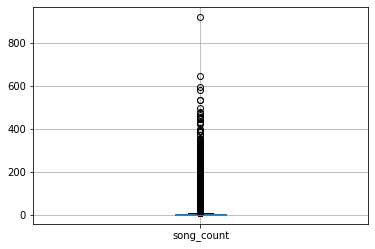

In [62]:
visible_evalutation.boxplot(column=["song_count"])

Looking at the box plot, it seems that the variables song_count, have outlier present in the variables. These outliers value needs to be teated and there are several ways of treating them:

    1.Drop the outlier value
    2.Replace the outlier value using the IQR

In [20]:
songs_df = pd.merge(visible_evalutation,unique_tracks.drop_duplicates(["song_id"]),on='song_id',how="left")
songs_df.head()

,user_id,song_id,song_count,track_id,singer_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [64]:
from scipy import stats
from scipy.stats import norm


In [65]:
#Basic Stats
print("Mean of freq. : ",np.mean(songs_df["song_count"]))
print("Mode of freq. : ",stats.mode(songs_df["song_count"]))
print("Median of freq. : ",np.median(songs_df["song_count"]))

Mean of freq. :  3.1871492343202616
Mode of freq. :  ModeResult(mode=array([1]), count=array([839136]))
Median of freq. :  1.0


In [66]:
#unique values
print("Total users : ",songs_df["user_id"].unique().size)
print("Total songs : ",songs_df["song_id"].unique().size)
print("Total tracks : ",songs_df["track_id"].unique().size)

Total users :  110000
Total songs :  163206
Total tracks :  163206


In [67]:

print("Unique Titles : " ,songs_df["release"].unique().size)
print("Unique Artists : " ,songs_df["singer_name"].unique().size)

Unique Titles :  137623
Unique Artists :  28361


In [68]:
songs_tab = pd.crosstab(index=songs_df["song_id"],columns="count")
songs_tab.head()

col_0,count
song_id,
SOAAAFI12A6D4F9C66,2
SOAAAGK12AB0189572,1
SOAAAGQ12A8C1420C8,33
SOAAAMT12AB018C9C4,1
SOAAAQN12AB01856D3,2


In [69]:
print(max(songs_tab["count"]))
print(songs_tab.query("count==5043"))

5043
col_0               count
song_id                  
SOFRQTD12A81C233C0   5043


In [70]:
songs_df.columns

Index(['user_id', 'song_id', 'song_count', 'track_id', 'singer_name',
       'release'],
      dtype='object')

This data set contains a shape of ***(1083924, 6)***

#Exploratory Data Analysis

#Univariate analysis

In [24]:
data_for_analysis=songs_df.iloc[20]
data_for_analysis

NameError: ignored

In [25]:
sns_plot = sns.distplot(songs_df["song_count"])

NameError: ignored

Histogram

Histograms are similar to bar charts and display the same categorical variables against the category of data. Histograms display these categories as bins which indicate the number of data points in a range. It is best for visualizing continuous data.

In [ ]:
plt.figure(dpi = 100, figsize=(15,4))
plt.hist(songs_df.song_count, edgecolor = 'w')

In [26]:
 Col_names = ['song_count']

fig, ax = plt.subplots(len(Col_names), figsize=(16,12))

for i, Col_names in enumerate(Col_names):

    sns.distplot(songs_df[Col_names], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+Col_names, fontsize=10)
    ax[i].set_xlabel(Col_names, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

NameError: ignored

**Bivariate Analysis**

When we talk about bivariate analysis, it means analyzing 2 variables. Since we know there are numerical and categorical variables, there is a way of analyzing these variables as shown below:

**Numerical vs. Numerical**
1. Scatterplot
2. Line plot
3. Heatmap for correlation
4. Joint plot

Categorical vs. Numerical
1. Bar chart
2. Violin plot
3. Categorical box plot
4.Swarm plot

Two Categorical Variables
1. Bar chart
2. Grouped bar chart
3. Point plot



This is the important dataset because it contained song_count.since we are carrying out ***Popularity based recommendation system*** the count of songs is much important for analysis

##Presentation on 21/06/2021


Contents:

Notebook explaining the modeling techniques

Jupyter File with code implementation of models

Proper interpretations of results

Future scope and improvements


##***Types of recommendations:***

There are mainly **6 types** of the recommendations systems :-

**Popularity based systems** :- It works by recommeding items viewed and purchased by most people and are rated high.It is not a personalized recommendation.

**Classification model based**:- It works by understanding the features of the user and applying the classification algorithm to decide whether the user is interested or not in the product.

**Content based recommedations**:- It is based on the information on the contents of the item rather than on the user opinions.The main idea is if the user likes an item then he or she will like the "other" similar item.

**Collaberative Filtering**:- It is based on assumption that people like things similar to other things they like, and things that are liked by other people with similar taste. it is mainly of two types: a) User-User b) Item -Item

**Hybrid Approaches**:- This system approach is to combine collaborative filtering, content-based filtering, and other approaches .

**Association rule mining** :- Association rules capture the relationships between items based on their patterns of co-occurrence across transactions.

##Popularity based Recommendation System

It is a type of recommendation system which works on the **principle of popularity and or anything which is in trend**. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.

 

For example, if a product is often purchased by most people then the system will get to know that that product is most popular so for every new user who just signed it, the system will recommend that product to that user also and chances becomes high that the new user will also purchase that. 

***Merits of popularity based recommendation system:***
 
1. It does not suffer from cold start problems which means on day 1 of the business also it can recommend products on various different filters.

2. There is no need for the user's historical data.

 



***Demerits of popularity based recommendation system***
 

1. Not personalized 

2. The system would recommend the same sort of products/movies which are solely based upon popularity to every other user.

In [27]:
visible_evalutation.dropna(axis='columns')#Checking for NaN[Not a Number] values as they will impact the analysis
visible_evalutation.dropna(how='all')

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [28]:
visible_evalutation.dropna(subset=['user_id', 'song_id',"song_count"])

,user_id,song_id,song_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


In [29]:
#Analysis of Songs  

visible_evaluation_df= pd.DataFrame(visible_evalutation.groupby('user_id')['song_count'].sum()) #Grouping song_count and user_id with the function sum
visible_evaluation_df

,song_count
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,13
00014a76ed063e1a749171a253bca9d9a0ff1782,24
00015189668691680bb1a2e58afde1541ec92ced,101
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,12
00020fcd8b01986a6a85b896ccde6c49f35142ad,44
...,...
fffdef71f13352e9cff769f1d96f5ccf90f8955e,10
fffe29116f96c97b47a5dabdd406784ad0ba6f30,10
fffe5b73c50c72ca9c54947efac1fcacf59c4a17,108


#Carrying out merge operation on two data frames using **left join,user-id** as attribute

In [30]:
final_df=pd.merge(visible_evaluation_df,visible_evalutation, how="left", on=["user_id"]) 
final_df

,user_id,song_count_x,song_id,song_count_y
0,00007a02388c208ea7176479f6ae06f8224355b3,13,SOAITVD12A6D4F824B,3
1,00007a02388c208ea7176479f6ae06f8224355b3,13,SONZGLW12A6D4FBBC1,1
2,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXNWYP12A6D4FBDC4,1
3,00007a02388c208ea7176479f6ae06f8224355b3,13,SOSPTOE12A6D4F938C,1
4,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXMOQF12A6701FB8B,1
...,...,...,...,...
1450928,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOOPDFE12A8C1386BB,5
1450929,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOKJVNA12A58A791C8,1
1450930,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOPSVIR12A8C138BB5,25
1450931,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOGEZGA12A6D4F74F6,1


KeyboardInterrupt: ignored

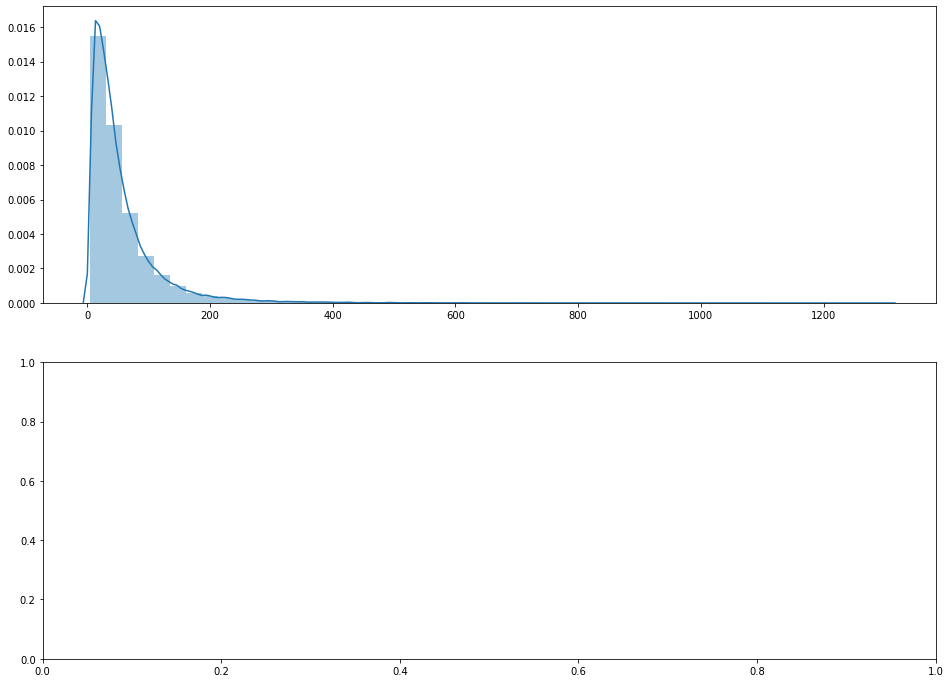

In [31]:
Col_names = ['song_count_x','song_count_y']

fig, ax = plt.subplots(len(Col_names), figsize=(16,12))

for i, Col_names in enumerate(Col_names):

    sns.distplot(final_df[Col_names], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+Col_names, fontsize=10)
    ax[i].set_xlabel(Col_names, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

This dataset contains **1450933 rows × 4 columns**

#Carrying out merge operation on two data frames using left join,song-id as attribute

In [32]:
final_data_df=pd.merge(final_df,unique_tracks,how="left",on=["song_id"])
final_data_df

,user_id,song_count_x,song_id,song_count_y,track_id,singer_name,release
0,00007a02388c208ea7176479f6ae06f8224355b3,13,SOAITVD12A6D4F824B,3,TRKSQAW128F148B2D7,Dredg,Convalescent
1,00007a02388c208ea7176479f6ae06f8224355b3,13,SONZGLW12A6D4FBBC1,1,TRFNAOK128F92F4B77,Sam Sparro,Black & Gold
2,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXNWYP12A6D4FBDC4,1,TRNJZYN128F4228F65,Pantera,Walk (Remastered LP Version)
3,00007a02388c208ea7176479f6ae06f8224355b3,13,SOSPTOE12A6D4F938C,1,TRDPXKD128F1499EF3,Local H,Bound For The Floor
4,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXMOQF12A6701FB8B,1,TRZUWSX128F92F491A,No Doubt,Spiderwebs
...,...,...,...,...,...,...,...
1491947,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOOPDFE12A8C1386BB,5,TRCAQLO128F4284DD0,Kenny G,Tradewinds
1491948,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOKJVNA12A58A791C8,1,TRLIWUN128F145D610,Bobby Darin,In A World Without You (1989 Digital Remaster)
1491949,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOPSVIR12A8C138BB5,25,TRXFYCU128F4258741,Bauhaus,Ziggy Stardust
1491950,ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee,42,SOGEZGA12A6D4F74F6,1,TRBHKVD128F146F758,Iron Maiden,Run To The Hills (1998 Digital Remaster)


This dataset contains **1491952 rows × 7 columns**

#Ranking Depending upon Song count

In [98]:
final_data_df['max_rank'] = final_data_df['song_count_x'].rank(method='max')
final_data_df

,user_id,song_count_x,song_id,song_count_y,track_id,singer_name,release,max_rank
0,00007a02388c208ea7176479f6ae06f8224355b3,13,SOAITVD12A6D4F824B,3,TRKSQAW128F148B2D7,Dredg,Convalescent,134.0
1,00007a02388c208ea7176479f6ae06f8224355b3,13,SONZGLW12A6D4FBBC1,1,TRFNAOK128F92F4B77,Sam Sparro,Black & Gold,134.0
2,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXNWYP12A6D4FBDC4,1,TRNJZYN128F4228F65,Pantera,Walk (Remastered LP Version),134.0
3,00007a02388c208ea7176479f6ae06f8224355b3,13,SOSPTOE12A6D4F938C,1,TRDPXKD128F1499EF3,Local H,Bound For The Floor,134.0
4,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXMOQF12A6701FB8B,1,TRZUWSX128F92F491A,No Doubt,Spiderwebs,134.0
...,...,...,...,...,...,...,...,...
995,0029b299091e9e9040761838785a0689a5f67215,151,SOFCPEE12A8C13D566,10,TRUQNJN128F428B7BB,Sound 5,Latin Static,967.0
996,0029b299091e9e9040761838785a0689a5f67215,151,SOOEMSR12AB018EA98,8,TRKEJFJ12903CD5053,Fernando Delgadillo,La Bañera,967.0
997,0029b299091e9e9040761838785a0689a5f67215,151,SOGNQMG12A8C133BBA,17,TRYKFDK128F423FC4F,Fonseca,Enredame,967.0
998,0029b299091e9e9040761838785a0689a5f67215,151,SOPQBHI12A58A777F6,5,TRKGMTU128F423FC65,Fonseca,Te Mando Flores,967.0


In [99]:
final_data_df['min_rank'] = final_data_df['song_count_x'].rank(method='min')
final_data_df

,user_id,song_count_x,song_id,song_count_y,track_id,singer_name,release,max_rank,min_rank
0,00007a02388c208ea7176479f6ae06f8224355b3,13,SOAITVD12A6D4F824B,3,TRKSQAW128F148B2D7,Dredg,Convalescent,134.0,120.0
1,00007a02388c208ea7176479f6ae06f8224355b3,13,SONZGLW12A6D4FBBC1,1,TRFNAOK128F92F4B77,Sam Sparro,Black & Gold,134.0,120.0
2,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXNWYP12A6D4FBDC4,1,TRNJZYN128F4228F65,Pantera,Walk (Remastered LP Version),134.0,120.0
3,00007a02388c208ea7176479f6ae06f8224355b3,13,SOSPTOE12A6D4F938C,1,TRDPXKD128F1499EF3,Local H,Bound For The Floor,134.0,120.0
4,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXMOQF12A6701FB8B,1,TRZUWSX128F92F491A,No Doubt,Spiderwebs,134.0,120.0
...,...,...,...,...,...,...,...,...,...
995,0029b299091e9e9040761838785a0689a5f67215,151,SOFCPEE12A8C13D566,10,TRUQNJN128F428B7BB,Sound 5,Latin Static,967.0,959.0
996,0029b299091e9e9040761838785a0689a5f67215,151,SOOEMSR12AB018EA98,8,TRKEJFJ12903CD5053,Fernando Delgadillo,La Bañera,967.0,959.0
997,0029b299091e9e9040761838785a0689a5f67215,151,SOGNQMG12A8C133BBA,17,TRYKFDK128F423FC4F,Fonseca,Enredame,967.0,959.0
998,0029b299091e9e9040761838785a0689a5f67215,151,SOPQBHI12A58A777F6,5,TRKGMTU128F423FC65,Fonseca,Te Mando Flores,967.0,959.0


In [100]:
final_data_df['pct_rank'] = final_data_df['song_count_x'].rank(pct=True)
final_data_df

,user_id,song_count_x,song_id,song_count_y,track_id,singer_name,release,max_rank,min_rank,pct_rank
0,00007a02388c208ea7176479f6ae06f8224355b3,13,SOAITVD12A6D4F824B,3,TRKSQAW128F148B2D7,Dredg,Convalescent,134.0,120.0,0.127
1,00007a02388c208ea7176479f6ae06f8224355b3,13,SONZGLW12A6D4FBBC1,1,TRFNAOK128F92F4B77,Sam Sparro,Black & Gold,134.0,120.0,0.127
2,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXNWYP12A6D4FBDC4,1,TRNJZYN128F4228F65,Pantera,Walk (Remastered LP Version),134.0,120.0,0.127
3,00007a02388c208ea7176479f6ae06f8224355b3,13,SOSPTOE12A6D4F938C,1,TRDPXKD128F1499EF3,Local H,Bound For The Floor,134.0,120.0,0.127
4,00007a02388c208ea7176479f6ae06f8224355b3,13,SOXMOQF12A6701FB8B,1,TRZUWSX128F92F491A,No Doubt,Spiderwebs,134.0,120.0,0.127
...,...,...,...,...,...,...,...,...,...,...
995,0029b299091e9e9040761838785a0689a5f67215,151,SOFCPEE12A8C13D566,10,TRUQNJN128F428B7BB,Sound 5,Latin Static,967.0,959.0,0.963
996,0029b299091e9e9040761838785a0689a5f67215,151,SOOEMSR12AB018EA98,8,TRKEJFJ12903CD5053,Fernando Delgadillo,La Bañera,967.0,959.0,0.963
997,0029b299091e9e9040761838785a0689a5f67215,151,SOGNQMG12A8C133BBA,17,TRYKFDK128F423FC4F,Fonseca,Enredame,967.0,959.0,0.963
998,0029b299091e9e9040761838785a0689a5f67215,151,SOPQBHI12A58A777F6,5,TRKGMTU128F423FC65,Fonseca,Te Mando Flores,967.0,959.0,0.963


In [101]:
final_data_df.columns

Index(['user_id', 'song_count_x', 'song_id', 'song_count_y', 'track_id',
       'singer_name', 'release', 'max_rank', 'min_rank', 'pct_rank'],
      dtype='object')

In [102]:
final_data_df=final_data_df.sort_values(by='song_count_x', ascending=False)

#Univariate Analysis

#Bar Plot

In [ ]:
plt.rcParams["figure.figsize"]=20,10

#plt.figure(figsize=(20,10))
final_data_df[0:100].plot(x="song_count_x", y=["max_rank"], kind="bar");
plt.show()

In [ ]:
plt.figure(dpi = 100, figsize=(15,4))
plt.hist(final_data_df.song_count_x[0:1000], edgecolor = 'w')

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot('song_count_x',data=final_data_df[0:1000],palette='ocean')

In [ ]:
Col_names = ["song_count_x","song_count_y","pct_rank",'max_rank', 'min_rank']

fig, ax = plt.subplots(len(Col_names), figsize=(16,12))

for i, Col_names in enumerate(Col_names):

    sns.distplot(final_data_df[0:1000][Col_names], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+Col_names, fontsize=10)
    ax[i].set_xlabel(Col_names, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [ ]:
plt.plot(final_data_df[0:1000].song_count_x, linestyle = 'dotted')
plt.show()

In [ ]:
sns.lineplot(data=final_data_df, x="song_count_x", y="max_rank")

In [ ]:
pie_presentation=final_data_df[["song_count_x","song_count_y","pct_rank",'max_rank', 'min_rank']]
pie_presentation.head()




#Linear Correlation


Linear Correlation represents the strength of a linear relationship between two numerical variables. If there is no correlation between the two variables, there is no tendency to change along with the values of the second quantity.

In [ ]:
coorelation=final_data_df[0:20].corr(method="spearman")
coorelation

In [ ]:
plt.figure(figsize=(8,5))

sns.heatmap(final_data_df[0:10].corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);

In [ ]:
sns.relplot(x='song_count_x', y='pct_rank', hue='song_count_y', data=final_data_df)

In [ ]:
fig = px.scatter(final_data_df[0:1000], x="song_count_x", y="pct_rank")
fig['layout'].update(title={"text" : 'song_count_x vs pct_rank','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [ ]:
sns.jointplot(final_data_df[0:1000]['song_count_x'], final_data_df[0:1000]['pct_rank'])

Multivariate Analysis:

Pair plot:

pair plot shows a clear and nice view of all variables and their relation ship with all other variables.

In [ ]:
sns.pairplot(final_data_df[0:1000])

In [ ]:
import plotly.express as px

fig = px.pie(final_data_df[0:10], values='song_count_x', names='song_id',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [106]:
artist_pop=final_data_df.groupby(by='singer_name')
artist_popularity=artist_pop['user_id'].nunique()

In [112]:
artist_popularity.sort_values(inplace=True,ascending=False)

In [113]:
artist_popularity.head()

singer_name
Train                     8
Alliance Ethnik           7
Lily Allen                5
Florence + The Machine    5
Kanye West                5
Name: user_id, dtype: int64

#Normalizing and Scaling



Often the variables of the data set are of different scales i.e. one variable is in millions and others in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.


In this method, we convert variables with different scales of measurements into a single scale. StandardScaler normalizes the data using the formula (x-mean)/standard deviation. We will be doing this only for the numerical variables.

#Recommendation for the user

Recommendation Depending upon Artist and Song Popularity

In [178]:
user_id_input=input("Enter the user_id:")
print("1.Song based popularity system","2.Singer based popularity system")
user_selection=int(input("Enter the input:"))

if user_selection==1:
  print("You have opted for Recommendation based on song popularity")
  recommendation=final_data_df[["pct_rank","release","song_count_x","singer_name"]].head(10)
  print("The recommendation for the user is:",recommendation)
if user_selection==2:
  print("You have opted for recommendation based on Singer_popularity")
  recommendation=artist_popularity.head(10)
  print("The recommendation for the user is:",recommendation)





Enter the user_id:fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1.Song based popularity system 2.Singer based popularity system
Enter the input:1
You have opted for Recommendation based on song popularity
The recommendation for the user is:      pct_rank              release  song_count_x        singer_name
323    0.9865  Yüregimle Seviyorum           262     Rafet El Roman
334    0.9865           Young love           262           Moto Boy
325    0.9865               De Weg           262       Guus Meeuwis
324    0.9865         Kathy's Song           262  Simon & Garfunkel
328    0.9865             I- IV- V           262           Injected
322    0.9865    The Joy Of Living           262            Blueboy
321    0.9865            Johnny 99           262  Bruce Springsteen
320    0.9865       Bookends Theme           262  Simon & Garfunkel
319    0.9865         Feel It Turn           262      Great Big Sea
318    0.9865        When We Dance           262              Sting


In [33]:
final_data_df=final_data_df[0:1000]

##Content-based Recommendation system

Recommendations done using content-based recommenders can be seen as a user-specific classification problem. This classifier learns the user's likes and dislikes from the features of the song.


The most straightforward approach is keyword matching.

In a few words, the idea behind is to extract meaningful keywords present in a song description a user likes, search for the keywords in other song descriptions to estimate similarities among them, and based on that, recommend those songs to the user.

How is this performed?

In our case, because we are working with text and words, Term Frequency-Inverse Document Frequency (TF-IDF) can be used for this matching process.

We'll go through the steps for generating a content-based music recommender system.

#Pros:Content Based Approach

1.No need for data on other users.

2.Able to recommend to users with unique tastes.

3.Able to recommend new and unpopular items.

4.Able to provide explanations.

#Cons: 

1.Finding appropriate features is hard.

2. Recommendation for new users

3.Overspecialization.
    
    Never recommends items outside users content profile.

    unable to exploit quality judgements of other users

In [151]:
final_data_df.head()

,user_id,song_count_x,song_id,song_count_y,track_id,singer_name,release,max_rank,min_rank,pct_rank
323,000923be99eda0ecf81ca3351794f80dd758f696,262,SODDKKK12A58A77F04,7,TRWYQMV128F92E48B6,Rafet El Roman,Yüregimle Seviyorum,1000.0,973.0,0.9865
334,000923be99eda0ecf81ca3351794f80dd758f696,262,SOMYLQW12AB0189A60,19,TRTOFKK12903CC8172,Moto Boy,Young love,1000.0,973.0,0.9865
325,000923be99eda0ecf81ca3351794f80dd758f696,262,SOPZFUV12A6D4F6001,1,TRSHBGG128F145C356,Guus Meeuwis,De Weg,1000.0,973.0,0.9865
324,000923be99eda0ecf81ca3351794f80dd758f696,262,SOKLSHI12A8C1379A8,10,TRYROHB128F92F5F3E,Simon & Garfunkel,Kathy's Song,1000.0,973.0,0.9865
328,000923be99eda0ecf81ca3351794f80dd758f696,262,SOQDKSU12B0B807746,1,TRWYRZL128F4265BFD,Injected,I- IV- V,1000.0,973.0,0.9865


In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvf = TfidfVectorizer(min_df=3,max_features=None,
                     strip_accents='unicode',analyzer='word',
                     ngram_range=(1,3),stop_words='english')
final_data_df["release"]=final_data_df["release"].fillna('')


In [144]:
tvf_matrix=tvf.fit_transform(final_data_df["release"])

In [145]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [146]:
cosine_similarities=sigmoid_kernel(tvf_matrix,tvf_matrix)

In [147]:
cosine_similarities[0]

array([0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

In [148]:
indices=pd.Series(final_data_df.index,index=final_data_df["singer_name"]).drop_duplicates()

In [171]:
def given_rec(singer_name,cosine_similarities=cosine_similarities):
  idx = indices[singer_name]
  sig_scores = list(enumerate(cosine_similarities[idx]))
  sig_scores =sorted(sig_scores,key=lambda x:x[1],reverse= True)
  sig_scores = sig_scores[1:11]
  music_indices = [i[0] for i in sig_scores]
  return final_data_df["singer_name"].iloc[music_indices]
    
   

In [172]:
# top 10 Recommendation based on Content based
given_rec('Freeway')

522                   Afroman
243            The Black Keys
435                 The Hives
347    Florence + The Machine
323            Rafet El Roman
334                  Moto Boy
325              Guus Meeuwis
324         Simon & Garfunkel
328                  Injected
322                   Blueboy
Name: singer_name, dtype: object

#ITEM-ITEM Based colloborative recommendation system

#Pros/Cons of Colloborative Filtering

Pro:
1.Works for any kind of item.

Cons:

1.Cold Start

2.Sparsity

3.First rater

4.popularity based.

In [125]:
#dataWide = final_data_df.pivot("user_id", "singer_name", "song_count_x")
result = final_data_df.pivot_table(index='user_id', 
                        columns='singer_name', 
                        values='song_count_x')
result.columns.name = None
result

,+ / - {Plus/Minus},+44,23 Skidoo,3 Doors Down,311,3OH!3,A Rocket To The Moon,A-Ha,A.B. Quintanilla's All Starz,Aaliyah,Aesop Rock,Afrika Bambaataa & The Soul Sonic Force,Afroman,Air Supply,Alanis Morissette,Alejandra Guzmán,Alejandro Fernandez,Alesana,Alesha Dixon,Alliance Ethnik,Alter Ego,Amanda Perez,Ambrosia,Amos Lee,Amy Winehouse,Andre Hazes,Andrew Peterson,Angels and Airwaves,Animal Collective,Anouk,Antony & The Johnsons,April Wine,Arch Enemy,Art Of Noise,Ashley Tisdale,Atreyu,Attica! Attica!,Audioslave,Avenged Sevenfold,Aventura,...,Tom Petty And The Heartbreakers,Tony Carreira,Tori Amos,Train,Travie McCoy,Trey Songz,Tub Ring,Twista feat. Kayne West & Jamie Foxx,Two Gallants,U2,UN-CUT,Ulf Wakenius,Urban Chill Out,Us3,Usher Featuring Lil' Jon & Ludacris,Usher Featuring The Nu Beginning,Usher featuring will.i.am,Van Halen,Victor Jara,Violent Femmes,Violeta Parra,Von Iva,Warren Barfield,Wax Tailor,Ween,Weezer,Westbam,Westside Connection,Wham,Whitney Houston feat. Faith Evans and Kelly Price,Wild Cherry,Will Smith,Within Temptation,Worriedaboutsatan,Wyclef Jean featuring Claudette Ortiz of City High,X Marks The Pedwalk,X ray pop,Ying Yang Twins ft. Pitbull,Young Money featuring Lloyd,Yung Joc
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00007a02388c208ea7176479f6ae06f8224355b3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00014a76ed063e1a749171a253bca9d9a0ff1782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00015189668691680bb1a2e58afde1541ec92ced,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00020fcd8b01986a6a85b896ccde6c49f35142ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0027bd60fea07d48fa336a979f9fa439bebb44fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.0,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
002847c13b472f8c650c43847c06c3a76b4ec0a6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [126]:
result.loc["00007a02388c208ea7176479f6ae06f8224355b3",:]

+ / - {Plus/Minus}            NaN
+44                           NaN
23 Skidoo                     NaN
3 Doors Down                  NaN
311                           NaN
                               ..
X Marks The Pedwalk           NaN
X ray pop                     NaN
Ying Yang Twins ft. Pitbull   NaN
Young Money featuring Lloyd   NaN
Yung Joc                      NaN
Name: 00007a02388c208ea7176479f6ae06f8224355b3, Length: 629, dtype: float64

In [127]:
#Replace NA with 0 
result.fillna(0, inplace=True)

In [128]:
data_ib = result.copy()

In [129]:
data_ib.

,+ / - {Plus/Minus},+44,23 Skidoo,3 Doors Down,311,3OH!3,A Rocket To The Moon,A-Ha,A.B. Quintanilla's All Starz,Aaliyah,Aesop Rock,Afrika Bambaataa & The Soul Sonic Force,Afroman,Air Supply,Alanis Morissette,Alejandra Guzmán,Alejandro Fernandez,Alesana,Alesha Dixon,Alliance Ethnik,Alter Ego,Amanda Perez,Ambrosia,Amos Lee,Amy Winehouse,Andre Hazes,Andrew Peterson,Angels and Airwaves,Animal Collective,Anouk,Antony & The Johnsons,April Wine,Arch Enemy,Art Of Noise,Ashley Tisdale,Atreyu,Attica! Attica!,Audioslave,Avenged Sevenfold,Aventura,...,Tom Petty And The Heartbreakers,Tony Carreira,Tori Amos,Train,Travie McCoy,Trey Songz,Tub Ring,Twista feat. Kayne West & Jamie Foxx,Two Gallants,U2,UN-CUT,Ulf Wakenius,Urban Chill Out,Us3,Usher Featuring Lil' Jon & Ludacris,Usher Featuring The Nu Beginning,Usher featuring will.i.am,Van Halen,Victor Jara,Violent Femmes,Violeta Parra,Von Iva,Warren Barfield,Wax Tailor,Ween,Weezer,Westbam,Westside Connection,Wham,Whitney Houston feat. Faith Evans and Kelly Price,Wild Cherry,Will Smith,Within Temptation,Worriedaboutsatan,Wyclef Jean featuring Claudette Ortiz of City High,X Marks The Pedwalk,X ray pop,Ying Yang Twins ft. Pitbull,Young Money featuring Lloyd,Yung Joc
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00007a02388c208ea7176479f6ae06f8224355b3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00014a76ed063e1a749171a253bca9d9a0ff1782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00015189668691680bb1a2e58afde1541ec92ced,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00020fcd8b01986a6a85b896ccde6c49f35142ad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
data_ib = data_ib.reset_index()
data_ib

,user_id,+ / - {Plus/Minus},+44,23 Skidoo,3 Doors Down,311,3OH!3,A Rocket To The Moon,A-Ha,A.B. Quintanilla's All Starz,Aaliyah,Aesop Rock,Afrika Bambaataa & The Soul Sonic Force,Afroman,Air Supply,Alanis Morissette,Alejandra Guzmán,Alejandro Fernandez,Alesana,Alesha Dixon,Alliance Ethnik,Alter Ego,Amanda Perez,Ambrosia,Amos Lee,Amy Winehouse,Andre Hazes,Andrew Peterson,Angels and Airwaves,Animal Collective,Anouk,Antony & The Johnsons,April Wine,Arch Enemy,Art Of Noise,Ashley Tisdale,Atreyu,Attica! Attica!,Audioslave,Avenged Sevenfold,...,Tom Petty And The Heartbreakers,Tony Carreira,Tori Amos,Train,Travie McCoy,Trey Songz,Tub Ring,Twista feat. Kayne West & Jamie Foxx,Two Gallants,U2,UN-CUT,Ulf Wakenius,Urban Chill Out,Us3,Usher Featuring Lil' Jon & Ludacris,Usher Featuring The Nu Beginning,Usher featuring will.i.am,Van Halen,Victor Jara,Violent Femmes,Violeta Parra,Von Iva,Warren Barfield,Wax Tailor,Ween,Weezer,Westbam,Westside Connection,Wham,Whitney Houston feat. Faith Evans and Kelly Price,Wild Cherry,Will Smith,Within Temptation,Worriedaboutsatan,Wyclef Jean featuring Claudette Ortiz of City High,X Marks The Pedwalk,X ray pop,Ying Yang Twins ft. Pitbull,Young Money featuring Lloyd,Yung Joc
0,00007a02388c208ea7176479f6ae06f8224355b3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00014a76ed063e1a749171a253bca9d9a0ff1782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00015189668691680bb1a2e58afde1541ec92ced,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00020fcd8b01986a6a85b896ccde6c49f35142ad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0027bd60fea07d48fa336a979f9fa439bebb44fb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,99.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,002847c13b472f8c650c43847c06c3a76b4ec0a6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [134]:
#dataWide = final_data_df.pivot("user_id", "singer_name", "song_count_x")
result = final_data_df.pivot_table(index='singer_name', 
                        columns='user_id', 
                        values='song_count_x')
result.columns.name = None
result

,00007a02388c208ea7176479f6ae06f8224355b3,00014a76ed063e1a749171a253bca9d9a0ff1782,00015189668691680bb1a2e58afde1541ec92ced,0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,00020fcd8b01986a6a85b896ccde6c49f35142ad,0003477fcf455dc4fcae3d7ca5e329cef811c868,0003798d61a8010dbfd8010180b7107cbbb8a649,0003d5245414b9c6244046543a06f601bfc97949,00040e91f2f614ca2f94ebc558dd0fc53ea2b875,0004dd6499e2e3f630f070416c437627de60d5c1,0005b81b840251543089e816fb790690e3914df2,00061a993bb3add5cc37b2ea28a9552337f2fe4d,0006a8a3733a7009f8bc109ccb3cdb59a19721ad,0006dfb63a4b7b1790a18c4c92da3b9dbcbc02bb,00071174209267a7f504e23d0c48d16f820b69e9,0007140a3796e901f3190f12e9de6d7548d4ac4a,0007151403610e6b0d8c9c7352b2a72144a212d8,00071b4e8ffb68920638635660f887e8c43a3f36,000724134199acaa98869fc4ffb805198d2940eb,0007ccf17b03de70b8642e2548fe4c9be3b9e560,0007e2fe805dd791cd082707a85cd616e7808ea5,0008c5592e089fff5a99c4bd1ef4c2fc1a7bf2a8,000923be99eda0ecf81ca3351794f80dd758f696,000a05d1543724ff087cea15ede2fe4eb417ae8b,000a43eb37163bb2f93020e107a2d543f27257b7,000ae9c80733348ff64cd3716a27477b94578d9d,000b22f91d4992dba3a80025493059f972a7850e,000b30862af21f64b05bc8b35a1a13577948d34d,000b8aba8fde15a79a947b2fdaacf162726d4630,000d1ab78dfe1ed9201b762370743af08dc53f5b,000dd7137b511a0c6e45880de551c6a7019ee4c3,000e9f98723b794e38d0415feb456eaac0e63285,000ecb4f239a7357b25e2500da9df9398ab9b594,000f1aea4be1f190c79fcaf0ba158732b210fc0f,000f7987ddcba4eefb4a3f37d78c3347d887a1e7,000ff0be2ddd080905d46d155d2c3821cc127040,0011d5f4fb02ff276763d385c3f2ded2b00ad94a,00129ab0a7e969359aceab8c1db3db3342e17518,00133eb8defa02da0534ff57a16f0fbd2e0daf41,001599607ba12f1aa6d6ffe3237e00c4dda0055c,0015c41d2d3fd639bad125cf737039dcc65e1865,0015fa97e2a0ec2eaa252b9d892f8bac269e8c8b,00163db1225a833be3ce50798198a8059a507dae,0017af1a903e9c32db1c3ac11fc6fff3213c2e96,0017f8c0a7facc540d611a7e56d2bcb592a82e17,0018d1de3585ff6005231debf4ff57e57f0c56de,0018e70be70ebbdf1f2ec2dab891d0de0fe25710,001943f33f2b2b713f239c3e9f7f3233594ca4ab,001a4329228373ec5d4efe1084317b4009df7b97,001a90168b86a9245cb0c6e4f855554d3d820266,001ac18f239ceca07c4ddef652ba9308d12d077b,001d3538260219125ec5df00c729cc3101f24de4,001d48a813a155714bf8c089362a7bb067a3a9b6,001d55f4f1f0bcd8a21d5f9716cc1fc8cf1fb511,001db6e9e8f569b3d7d24b49db576d179f290fd2,001eed159e8a038e5c5c63fe439ea5acead124f4,001f374c7ddbc33487f78d81c8799355472202fb,001facc86749a0c02d628e2767c7b387ce57d5cd,002007b5d12aa3dca204dc4c7289f1fa8b9170dd,00200865ee578746cc29b28d2c14a81c74895a5f,0020258bdaf943abce9ba7e8dea3c0b3f79f7227,00209c99d83b405d47fe87f6761dbf7d259ca856,0021ba5867d21d2a097c0f3c9655d0945fefcd77,00225d7501eca25941f9c3935c15402d191993bf,002326a7a9e649b172765be1fe733826d7995461,002511b392561fc1d426d875c386b356a6fc5702,00253790c9b54af7394b51087dbc19151f3d116e,002598ddfaf779558c8a2ca04cba63bce8544711,0025d2f2e74d13de4a8ba5c212de96c5bb00f78a,00260d826f3ed57d30857137d43725956a81d361,002611fd57ded2c1966a74e2684fa90a0d9829d7,002686bc6def481ec4647f20c0c897dd43550edd,0027476f23f148ac89294f27602f49668e5a5b60,0027bd60fea07d48fa336a979f9fa439bebb44fb,002847c13b472f8c650c43847c06c3a76b4ec0a6,0028f6d59b017142f1e5e430d7bc3e92206aae71,0029769a8f16da0b5242794e6b492fc099f2b742,0029b299091e9e9040761838785a0689a5f67215
singer_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
+ / - {Plus/Minus},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23 Skidoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [52]:
data_ibs = pd.DataFrame(index=data_ib.columns,
                        columns=data_ib.columns)

In [53]:
from scipy.spatial.distance import cosine

In [54]:
for i in range(0,len(data_ibs.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(data_ib.iloc[:,i],data_ib.iloc[:,j])

In [55]:
data_ibs.head()

,+ / - {Plus/Minus},+44,23 Skidoo,3 Doors Down,311,3OH!3,A Rocket To The Moon,A-Ha,A.B. Quintanilla's All Starz,Aaliyah,Aesop Rock,Afrika Bambaataa & The Soul Sonic Force,Afroman,Air Supply,Alanis Morissette,Alejandra Guzmán,Alejandro Fernandez,Alesana,Alesha Dixon,Alliance Ethnik,Alter Ego,Amanda Perez,Ambrosia,Amos Lee,Amy Winehouse,Andre Hazes,Andrew Peterson,Angels and Airwaves,Animal Collective,Anouk,Antony & The Johnsons,April Wine,Arch Enemy,Art Of Noise,Ashley Tisdale,Atreyu,Attica! Attica!,Audioslave,Avenged Sevenfold,Aventura,...,Tom Petty And The Heartbreakers,Tony Carreira,Tori Amos,Train,Travie McCoy,Trey Songz,Tub Ring,Twista feat. Kayne West & Jamie Foxx,Two Gallants,U2,UN-CUT,Ulf Wakenius,Urban Chill Out,Us3,Usher Featuring Lil' Jon & Ludacris,Usher Featuring The Nu Beginning,Usher featuring will.i.am,Van Halen,Victor Jara,Violent Femmes,Violeta Parra,Von Iva,Warren Barfield,Wax Tailor,Ween,Weezer,Westbam,Westside Connection,Wham,Whitney Houston feat. Faith Evans and Kelly Price,Wild Cherry,Will Smith,Within Temptation,Worriedaboutsatan,Wyclef Jean featuring Claudette Ortiz of City High,X Marks The Pedwalk,X ray pop,Ying Yang Twins ft. Pitbull,Young Money featuring Lloyd,Yung Joc
+ / - {Plus/Minus},1,0,0,0.368214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
+44,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23 Skidoo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3 Doors Down,0.368214,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.368214,0,0,0,0,0,0.929741,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.368214,0,0,0,0,0,0,0,0,0,0,0.368214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
data_neighbours = pd.DataFrame(index=data_ibs.columns,columns=range(1,4))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_ibs.columns)):
    data_neighbours.iloc[i,:3] = data_ibs.iloc[0:,i].sort_values(ascending=False)[:3].index

In [57]:
data_ibs.head()

,+ / - {Plus/Minus},+44,23 Skidoo,3 Doors Down,311,3OH!3,A Rocket To The Moon,A-Ha,A.B. Quintanilla's All Starz,Aaliyah,Aesop Rock,Afrika Bambaataa & The Soul Sonic Force,Afroman,Air Supply,Alanis Morissette,Alejandra Guzmán,Alejandro Fernandez,Alesana,Alesha Dixon,Alliance Ethnik,Alter Ego,Amanda Perez,Ambrosia,Amos Lee,Amy Winehouse,Andre Hazes,Andrew Peterson,Angels and Airwaves,Animal Collective,Anouk,Antony & The Johnsons,April Wine,Arch Enemy,Art Of Noise,Ashley Tisdale,Atreyu,Attica! Attica!,Audioslave,Avenged Sevenfold,Aventura,...,Tom Petty And The Heartbreakers,Tony Carreira,Tori Amos,Train,Travie McCoy,Trey Songz,Tub Ring,Twista feat. Kayne West & Jamie Foxx,Two Gallants,U2,UN-CUT,Ulf Wakenius,Urban Chill Out,Us3,Usher Featuring Lil' Jon & Ludacris,Usher Featuring The Nu Beginning,Usher featuring will.i.am,Van Halen,Victor Jara,Violent Femmes,Violeta Parra,Von Iva,Warren Barfield,Wax Tailor,Ween,Weezer,Westbam,Westside Connection,Wham,Whitney Houston feat. Faith Evans and Kelly Price,Wild Cherry,Will Smith,Within Temptation,Worriedaboutsatan,Wyclef Jean featuring Claudette Ortiz of City High,X Marks The Pedwalk,X ray pop,Ying Yang Twins ft. Pitbull,Young Money featuring Lloyd,Yung Joc
+ / - {Plus/Minus},1,0,0,0.368214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
+44,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23 Skidoo,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3 Doors Down,0.368214,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.368214,0,0,0,0,0,0.929741,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0.368214,0,0,0,0,0,0,0,0,0,0,0.368214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.137734,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:

data_neighbours = pd.DataFrame(index=data_ibs.columns,columns=range(1,6))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_ibs.columns)):
    data_neighbours.iloc[i,:5] = data_ibs.iloc[0:,i].sort_values(ascending=False)[:5].index

In [62]:
data_neighbours

,1,2,3,4,5
+ / - {Plus/Minus},+ / - {Plus/Minus},Morcheeba,Jadakiss / Swizz Beatz / OJ Da Juiceman,Country Joe & The Fish,Sporto Kantès
+44,Maria Bethânia,+44,Midge Ure,Buckcherry,Chelonis R. Jones
23 Skidoo,23 Skidoo,Craig David,Cassie,Yung Joc,Fontella Bass
3 Doors Down,3 Doors Down,Gian Marco,Bon Iver,José González,Antony & The Johnsons
311,T.Rex,Iration,Ida Corr Vs Fedde Le Grand,Facto Delafe y las flores azules,Björn Afzelius
...,...,...,...,...,...
X Marks The Pedwalk,Jason Aldean,X Marks The Pedwalk,Modern English,Gary Allan,Wild Cherry
X ray pop,Richard Souther,STRAIGHTENER,Edgar Oceransky,UN-CUT,Daedelus
Ying Yang Twins ft. Pitbull,Richard Souther,STRAIGHTENER,Edgar Oceransky,UN-CUT,Daedelus
Young Money featuring Lloyd,BMX Bandits,Lil Wayne / T-Pain,Young Money featuring Lloyd,Fat Joe featuring R. Kelly_ T.I._ Lil Wayne_ B...,Inverse


In [179]:
songs_df = pd.merge(visible_evalutation,unique_tracks.drop_duplicates(["song_id"]),on='song_id',how="left")
songs_df.head()

,user_id,song_id,song_count,track_id,singer_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero


In [180]:
# creating new feature combining title and artist name
songs_df['song'] = songs_df['release']+' - '+songs_df['singer_name']
songs_df.head()

,user_id,song_id,song_count,track_id,singer_name,release,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,TRAEHHJ12903CF492F,Dwight Yoakam,You're The One,You're The One - Dwight Yoakam
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,TRLGMFJ128F4217DBE,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,TRTNDNE128F1486812,Cartola,Tive Sim,Tive Sim - Cartola
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,TRASTUE128F930D488,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,TRFPLWO128F1486B9E,Miguel Calo,El Cuatrero,El Cuatrero - Miguel Calo


In [181]:
songs_df = songs_df.head(20000)

In [182]:
#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'song', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no songs for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique songs for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique songs in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [185]:
ir = item_similarity_recommender_py()
ir.create(songs_df, 'user_id', 'song')

In [186]:
user_items = ir.get_user_items(songs_df['user_id'][5])

In [187]:
# display user songs history
for user_item in user_items:
    print(user_item)

You're The One - Dwight Yoakam
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile) - Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner
Tive Sim - Cartola
Catch You Baby (Steve Pitron & Max Sanna Radio Edit) - Lonnie Gordon
El Cuatrero - Miguel Calo
Unite (2009 Digital Remaster) - Beastie Boys


In [188]:
# give song recommendation for that user
ir.recommend(songs_df['user_id'][5])

No. of unique songs for the user: 6
no. of unique songs in the training set: 13135
Non zero values in cooccurence_matrix :2315


,user_id,song,score,rank
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Hoy Que Ya No Estas Aqui - Il Divo,0.083333,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Heaven's Missing An Angel - 98º,0.083333,2
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,So I Need You - 3 Doors Down,0.083333,3
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,That's The Way Love Goes - David Frizzell,0.083333,4
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Runaway - 3 Doors Down,0.083333,5
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Rattlechaser - Xploding Plastix,0.083333,6
6,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Virtual Diva - Don Omar,0.083333,7
7,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Fly With Me - 98º,0.083333,8
8,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,Suruton nuoruusaika - Irwin Goodman,0.083333,9
9,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,El Profe - Miranda!,0.083333,10


In [189]:
# give related songs based on the words
ir.get_similar_items(['Fleet Foxes', 'Pearl Jam'])

no. of unique songs in the training set: 13135
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Hociquito de raton - Bersuit Vergarabat,0.0,1
1,,Bad With My Hands - The High Strung,0.0,2
2,,Noam Chomsky Spring Break 2002 - Department of...,0.0,3
3,,Let My Love Open The Door (Underdog Album Vers...,0.0,4
4,,Into My Soul - Gabin featuring Dee Dee Bridgew...,0.0,5
5,,The Animator - Junior Boys,0.0,6
6,,Red Clay Halo - Gillian Welch,0.0,7
7,,Birthday - Junior Boys,0.0,8
8,,Count Souvenirs - Junior Boys,0.0,9
9,,Parallel Lines - Junior Boys,0.0,10


##Future Scope

1.Hybrid Recommendation system

2.Using suprise library to implement recommender system.

##Conclusion


Content-based filtering outperforms user collaborative filtering. Items are more similar and make more sense than users similarities.

The experiment showed that if a user liked song x before, then the next recommendation should be song y, since it scored the highest.

However, if the recommendation based on other users preferences based on similarities, then it showed that users didn’t like song A and Song B. Based on their weighed scores, it showed that Sond C would be the best recommendation.
Good thing about content based approach that you don’t need data about other users in order to make recommendations.

Problem with collaborative filtering is that when a unique user has a unique taste, there might not be similar matches of other users. Meanwhile, the content based approach can be build based on user and item profiles. Items can be recommended based on previous choices.

However, if a user never rated an item, it won’t be in the recommendations list.
The best approach would be to use a combination of different approaches. Mix of collaborative and content based filtering. Some of it will depend on preferences of the users and some on item features.